In [33]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


**There's no null value.**

In [14]:
len(df.shop_id.value_counts())

100

**There are 100 sneaker shops.**

In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**The mean of 'order_amount' is AOV, 'Average Order Value', which is 3145. Given sneaker is a relatively cheap item, the analysis result is not informative.**

**I can also see from the standard deviation of 'order_amount' is very high, which is 41282, almost 13 times of its mean. The difference between min-value and max-value is high as well.      
Therefore, I can make the assumption that there are a little percentage of orders that is big sales with a large amount of items and income. These are the outliers of the data that influence the AOV.**

### Detect outliers

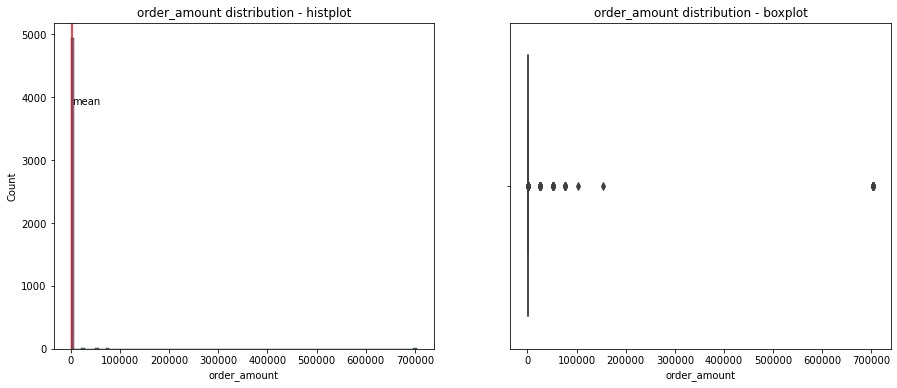

In [56]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(x=df.order_amount, bins=100, ax=ax[0])
sns.boxplot(x=df.order_amount, ax=ax[1])

ax[0].set_title('order_amount distribution - histplot')
ax[1].set_title('order_amount distribution - boxplot')

# add a vertical line
ax[0].axvline(df.order_amount.mean(), color='r')
ax[0].text(df.order_amount.mean()+1, ax[0].get_ylim()[1]*.75,'mean');

**From these two charts we can see that almost all the data is around the mean, 3145. There are some outliers in the range of (0, 100000) and around 700000.**

**To better evaluate the data, we should delete these outliers to get a more informative AOV.**

### Delete outliers

In [51]:
# delete the outliers by IQR
p25,p75 = df.order_amount.quantile(.25), df.order_amount.quantile(.75)
iqr = p75 - p25
iqr.round(2)

df.order_amount[(df.order_amount > p75+(100*iqr))].sort_values()

4918     25725
2922     25725
3151     25725
2773     25725
3440     25725
         ...  
4882    704000
3332    704000
2835    704000
1436    704000
15      704000
Name: order_amount, Length: 63, dtype: int64

**There are 63 data points with value higher than 10000, which are considered as outliers.**

In [52]:
df_in = df[(df.order_amount <= p75+(100*iqr))]
df_out = df[(df.order_amount > p75+(100*iqr))]

In [54]:
df_in.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [55]:
df_in.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


**With the outliers deleted, the AOV is 302 dollars and average item number of each order is 1.99.    
Now it makes sense! Most of time customers buy 2 pairs of sneakers and pay 300 dollars for one order.**

### The "outliers"

In [64]:
df_out.sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
...,...,...,...,...,...,...,...
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00


**As for the so-called "outliers", some of them are large order with 2000 items and some are expensive purchase in the shop No.78, where one item costs 25725.** 

### Median

**To evaluate the data with outliers, I can also use median, which represents the average of the data as well.**

In [65]:
df.order_amount.median()

284.0